#<b>Part 2

###<b> Mounting the Drive

In [1]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [2]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Load the data</b>

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file; extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

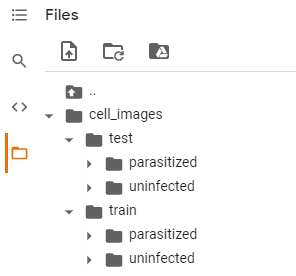

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, create the labels for both types of images to be able to train and test the model. 


In [4]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [5]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [6]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [8]:
# Normalizing the train and test images by dividing it by 255 and converting them to float32
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

### **Build Model**

###<B>One Hot Encoding on the train and test labels

In [9]:
from tensorflow.keras.utils import to_categorical

# Encoding train Labels
train_labels = to_categorical(train_labels, 2)

# Encoding test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**

The Base Model has been fully built and evaluated; process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training Model

In [10]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators to ensure the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [11]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [13]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [14]:
# Fit the model with min batch size as 32; can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 17s 7ms/step - loss: 0.4106 - accuracy: 0.8023 - val_loss: 0.1524 - val_accuracy: 0.9523
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1172 - accuracy: 0.9588 - val_loss: 0.1134 - val_accuracy: 0.9826
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0911 - accuracy: 0.9703 - val_loss: 0.0732 - val_accuracy: 0.9890
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0798 - accuracy: 0.9737 - val_loss: 0.0901 - val_accuracy: 0.9816
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0752 - accuracy: 0.9751 - val_loss: 0.0612 - val_accuracy: 0.9882
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0679 - accuracy: 0.9763 - val_loss: 0.0587 - val_accuracy: 0.9844
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0675 - accuracy: 0.9774 - val_loss: 0.0670 - val_accuracy: 0.9846
Epoch

###<b> Evaluating the model on test data

In [15]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 5ms/step - loss: 0.0749 - accuracy: 0.9777

 Test_Accuracy:- 0.9776923060417175


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



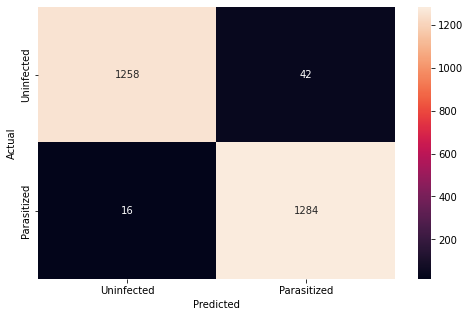

In [16]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [17]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="lower right")

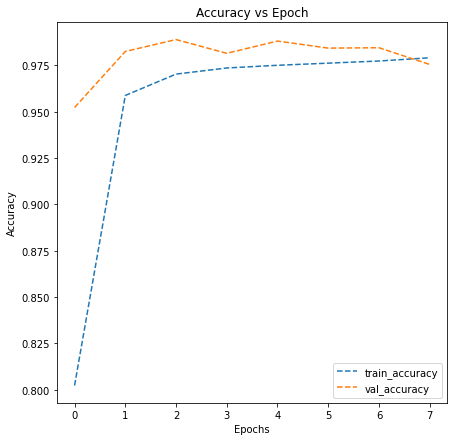

In [18]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

Building another model with few more add on layers and altering the activation functions and checking model if improved. 

###<b> Model 1
####<b> Trying to improve the performance of model by adding new layers


In [19]:
# Clearing the backend for new model
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [20]:
# Creating sequential model
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(256, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [21]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [22]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [23]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.3218 - accuracy: 0.8428 - val_loss: 0.1298 - val_accuracy: 0.9677
Epoch 2/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0955 - accuracy: 0.9702 - val_loss: 0.0606 - val_accuracy: 0.9806
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0857 - accuracy: 0.9731 - val_loss: 0.0558 - val_accuracy: 0.9820
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0782 - accuracy: 0.9755 - val_loss: 0.0593 - val_accuracy: 0.9768
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0744 - accuracy: 0.9761 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0702 - accuracy: 0.9761 - val_loss: 0.0505 - val_accuracy: 0.9818
Epoch 7/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0719 - accuracy: 0.9767 - val_loss: 0.0475 - val_accuracy: 0.9826


###<b> Evaluating the model

In [24]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])



82/82 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9796

 Test_Accuracy:- 0.9796153903007507


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



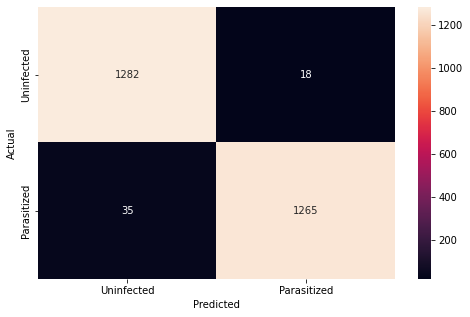

In [25]:

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

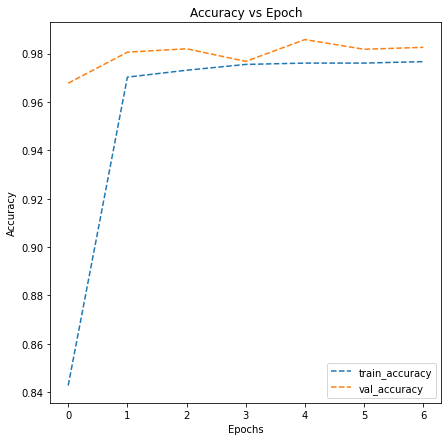

In [26]:
plot_accuracy(history1)


Building a model using BatchNormalization and using LeakyRelu as activation function.

###<b> Model 2 with Batch Normalization

In [27]:
# Clearing the backend for new model

from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [28]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))


model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(256))

model2.add(LeakyReLU(0.1))

model2.add(Dropout(0.4))

model2.add(BatchNormalization())

model2.add(Dense(512))

model2.add(LeakyReLU(0.1))

model2.add(Dropout(0.4))

model2.add(BatchNormalization())

model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 


adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9

###<b>Compiling the model

In [29]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [30]:
'''

creating the callbacks similarly as done in the base model
as callbacks help in saving checkpoints and stopping at an accuracy where the model does not seem to improve

'''
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [31]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 8s 10ms/step - loss: 0.3553 - accuracy: 0.8436 - val_loss: 0.0118 - val_accuracy: 0.9982
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.1255 - accuracy: 0.9578 - val_loss: 0.0299 - val_accuracy: 0.9898
Epoch 3/20
624/624 [==============================] - 5s 9ms/step - loss: 0.1009 - accuracy: 0.9685 - val_loss: 0.0534 - val_accuracy: 0.9842


<b>Plotting the train and validation accuracy

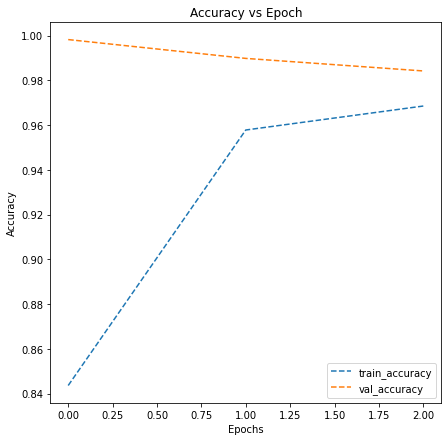

In [32]:
# Plotting the accuracies
plot_accuracy(history2)


###<b>Evaluating the model

In [33]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])



82/82 [==============================] - 1s 5ms/step - loss: 0.0767 - accuracy: 0.9777

 Test_Accuracy:- 0.9776923060417175


<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



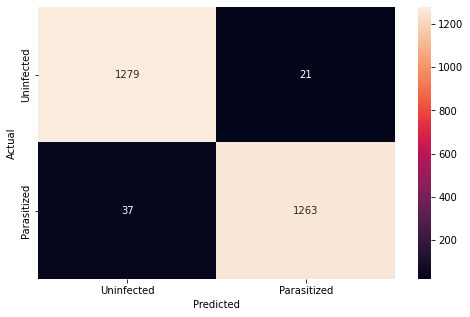

In [34]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


References to image data augmentation:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [35]:
# Clearing backend for new model

from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Using image data generator

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

####<B>Visualizing Augmented images

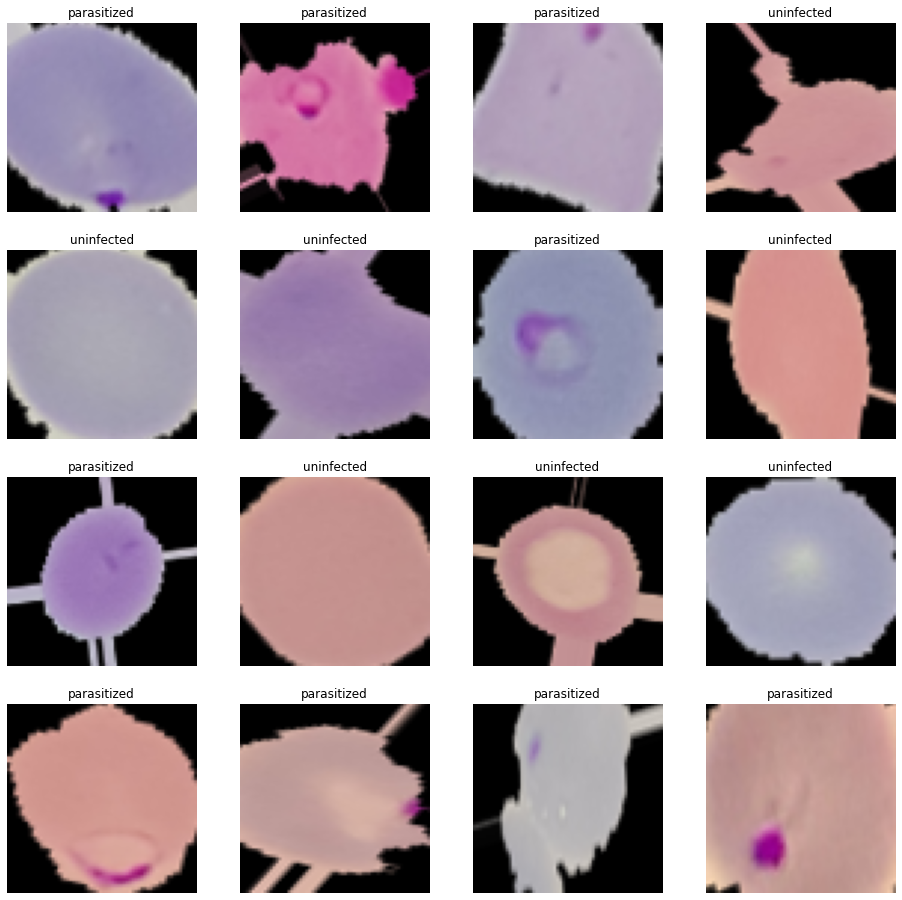

In [37]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

###<b>Building the Model

In [38]:
model3 = Sequential()

# Creating sequential model
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(256, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 


# optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)       

<b>Using Callbacks

In [39]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [40]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)



Epoch 1/20
312/312 [==============================] - 22s 67ms/step - loss: 0.5601 - accuracy: 0.6861 - val_loss: 0.1443 - val_accuracy: 0.9641
Epoch 2/20
312/312 [==============================] - 20s 66ms/step - loss: 0.2025 - accuracy: 0.9298 - val_loss: 0.0851 - val_accuracy: 0.9702
Epoch 3/20
312/312 [==============================] - 21s 66ms/step - loss: 0.1781 - accuracy: 0.9392 - val_loss: 0.0762 - val_accuracy: 0.9776
Epoch 4/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1645 - accuracy: 0.9457 - val_loss: 0.0735 - val_accuracy: 0.9782
Epoch 5/20
312/312 [==============================] - 21s 66ms/step - loss: 0.1561 - accuracy: 0.9467 - val_loss: 0.0631 - val_accuracy: 0.9774
Epoch 6/20
312/312 [==============================] - 21s 66ms/step - loss: 0.1547 - accuracy: 0.9481 - val_loss: 0.0602 - val_accuracy: 0.9784
Epoch 7/20
312/312 [==============================] - 21s 66ms/step - loss: 0.1480 - accuracy: 0.9494 - val_loss: 0.0685 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

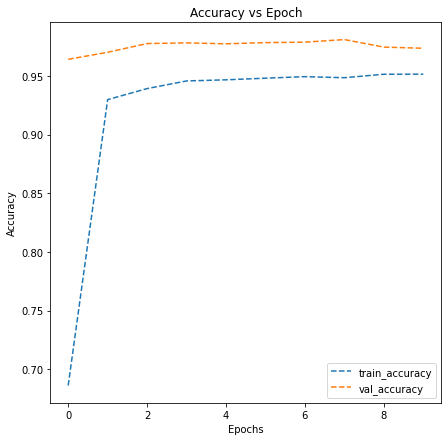

In [41]:
# Potting the accuracies
plot_accuracy(history3)

In [42]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])



82/82 [==============================] - 1s 6ms/step - loss: 0.0673 - accuracy: 0.9796

 Test_Accuracy:- 0.9796153903007507


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



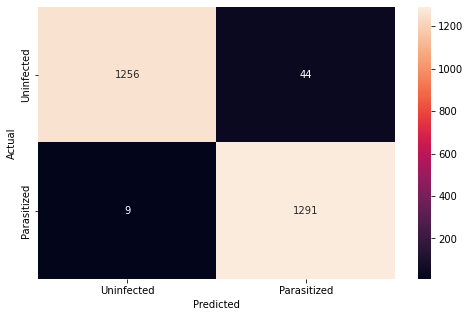

In [43]:
pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Using a pretrained model, VGG16, and checking how it performs on data.

### **Pre-trained model (VGG16)**

In [44]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [45]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [46]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)


model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [47]:
# Compiling the model 
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


<b> using callbacks

In [48]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [49]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)


Epoch 1/10
624/624 [==============================] - 16s 23ms/step - loss: 0.2325 - accuracy: 0.9078 - val_loss: 0.3968 - val_accuracy: 0.8423
Epoch 2/10
624/624 [==============================] - 14s 22ms/step - loss: 0.1891 - accuracy: 0.9276 - val_loss: 0.2195 - val_accuracy: 0.9347
Epoch 3/10
624/624 [==============================] - 14s 22ms/step - loss: 0.1799 - accuracy: 0.9313 - val_loss: 0.0938 - val_accuracy: 0.9880
Epoch 4/10
624/624 [==============================] - 14s 22ms/step - loss: 0.1750 - accuracy: 0.9338 - val_loss: 0.1151 - val_accuracy: 0.9746
Epoch 5/10
624/624 [==============================] - 14s 22ms/step - loss: 0.1646 - accuracy: 0.9376 - val_loss: 0.0660 - val_accuracy: 0.9896
Epoch 6/10
624/624 [==============================] - 14s 22ms/step - loss: 0.1644 - accuracy: 0.9371 - val_loss: 0.2674 - val_accuracy: 0.9135
Epoch 7/10
624/624 [==============================] - 14s 22ms/step - loss: 0.1606 - accuracy: 0.9395 - val_loss: 0.1862 - val_accuracy:

<b>Plot the train and validation accuracy

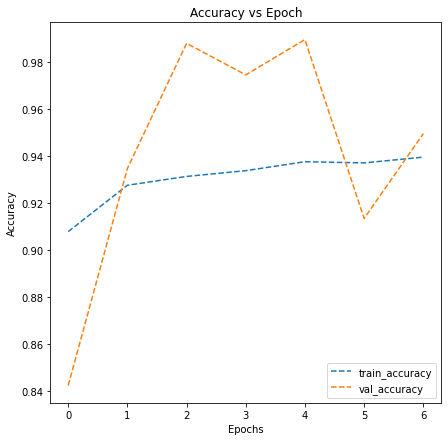

In [50]:
# plotting the accuracies
plot_accuracy(history4)


###<b> Evaluating the model

In [51]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])


82/82 [==============================] - 2s 22ms/step - loss: 0.1749 - accuracy: 0.9335

 Test_Accuracy:- 0.9334615468978882


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1300
           1       0.90      0.97      0.94      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



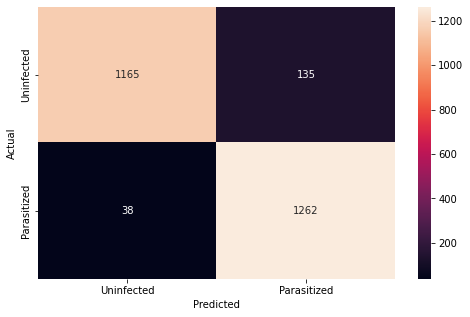

In [52]:
# Plot the confusion matrix and generate a classification report for the model
pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [53]:
print('Model0 Base Model:\t\t', accuracy[1])
print('Model1 with Additional Layers:\t', accuracy1[1])
print('Model2 with Batch Normalization:', accuracy2[1])
print('Model3 with Data Augmentation:\t', accuracy3[1])
print('Model4 Pre-trained model (VGG16):', accuracy4[1])
                                      

Model0 Base Model:		 0.9776923060417175
Model1 with Additional Layers:	 0.9796153903007507
Model2 with Batch Normalization: 0.9776923060417175
Model3 with Data Augmentation:	 0.9796153903007507
Model4 Pre-trained model (VGG16): 0.9334615468978882
